## EPP Coursework 1, Part B: The Data Project  
Ross Herencia  

## Introduction

The results of 5000 proton-proton ($pp$) collisions, producing and electron postitron pair ($e^-e^+$), have been recoreded by a detector. It is thought that the $e^-e^+$ pair are the decay products of the same mother particle $A$. This report investigates the nature and dynamics of the mother particle.  

## Method

In the following analysis, data containing information of the energy and momenta of the 5000 $e^-e^+$ pairs will be used to reconstruct the mass $m_A$ and momentum $P_A$ of the mother particle. The pandas library will be used to handle the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fig_num = 1
filepath = 'datafile.csv'
data = pd.read_csv(filepath, index_col=0)
data = data/1000  # /1000 to convert values to GeV
data

,ele_E,ele_Px,ele_Py,ele_Pz,pos_E,pos_Px,pos_Py,pos_Pz
Event,,,,,,,,
0,91.9627,-21.25940,-22.43340,86.61360,36.5255,8.271760,34.09940,10.14530
1,267.2110,12.88650,60.50000,259.95300,122.3730,0.865726,-30.62440,118.47600
2,79.8513,6.82322,49.40190,62.36290,38.8658,3.582750,-35.40890,15.61820
3,77.8501,-23.16490,16.15560,72.54670,30.2295,26.264700,1.33405,-14.90660
4,28.4838,27.16970,-4.02682,-7.54432,143.2160,-26.110400,6.29678,-140.67500
...,...,...,...,...,...,...,...,...
4995,97.4048,3.59432,-63.09500,74.12020,42.3949,-7.053460,29.84670,29.27040
4996,121.1480,5.38125,28.13580,117.71300,86.4572,-39.344300,-41.37360,64.92370
4997,117.5790,27.61870,19.04060,-112.69200,82.3255,-42.871400,-11.67050,-69.30600


## Mass of the mother particle

Assuming that the mother particle $A$ decayed into the electron and positron only, the invariant mass is given by

\begin{equation}
 m_{A}^2c^2 = P_{\mu}P^{\mu} = (P_{e^-} + P_{e^+})_{\mu}(P_{e^-} + P_{e^+})^{\mu}.
\tag{1}
\end{equation}

So,

\begin{equation}
 m_{A} = \sqrt{(E_{e^-} + E_{e^+})^2 - (P_{e^-}^x + P_{e^+}^x)^2 - (P_{e^-}^y + P_{e^+}^y)^2 - (P_{e^-}^z + P_{e^+}^z)^2},
\tag{2}
\end{equation}

in natural units.

In [3]:
data['mA'] = np.sqrt((data[' ele_E'] + data['  pos_E'])**2 - 
                     (data[' ele_Px'] + data[' pos_Px'])**2 - 
                     (data[' ele_Py'] + data[' pos_Py'])**2 - 
                     (data[' ele_Pz'] + data[' pos_Pz'])**2)

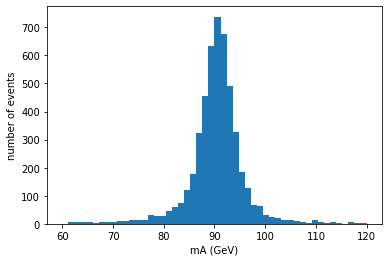

Figure 1: Distribution of values for the reconstruced mass of the mother particle A.


In [4]:
plt.hist(data['mA'], range=(60, 120), bins=50)
plt.xlabel('mA (GeV)')
plt.ylabel('number of events')
plt.show()
print(f'Figure {fig_num}: Distribution of values for the ' \
      'reconstruced mass of the mother particle A.')
fig_num += 1

In [5]:
data['mA'].mean()

91.6733333842235

The distribution in figure 1 shows a well-defined peak around $90~\text{GeV}$ with a FWHM of approximately $\pm 5~\text{GeV}$. This information, and the calculated mean of $91.67~\text{GeV}$ strongly indicates that the mother particle is a $Z$ boson.

## Mother particle momentum

Conservation of momentum implies 

\begin{equation}
P_A^{\mu} = P_{e^-}^{\mu} + P_{e^+}^{\mu}.
\tag{3}
\end{equation}

Using

\begin{equation}
 p^{\mu}p_{\mu} = \frac{E^2}{c^2} - \vec{p}^2 = m^2c^2 
\tag{4}
\end{equation}

implies 

\begin{equation}
 p_A = \sqrt{ (E_{e^-} + E_{e^+})^2 - m_A^2}.
\tag{5}
\end{equation}

In [6]:
data['P_A'] = np.sqrt((data[' ele_E'] + data['  pos_E'])**2 - data['mA']**2)

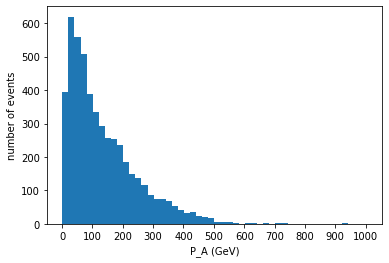

Figure 2: Distribution of the magnitude of the mother particle momentum.


In [7]:
plt.hist(data['P_A'], bins=50)
plt.xlabel('P_A (GeV)')
plt.ylabel('number of events')
plt.xticks(np.arange(0, 1100, 100))
plt.show()
print(f'Figure {fig_num}: Distribution of the magnitude '\
      'of the mother particle momentum.')
fig_num += 1

Figure 2 shows the reconstructed mother particle momentum for each event. The results show a peak between $0~\text{GeV}$ and $100~\text{GeV}$, and the number of events with momentum greater than $100~\text{GeV}$ decreases significantly. There are approximately 400 events with $ 0~\text{GeV} \leq P_A \leq 20~\text{GeV}$ but the lack of a sharp peak at $0~\text{GeV}$ suggests that, in general, the mother particle is not produced at rest in the detector.

## Electron energy distribution

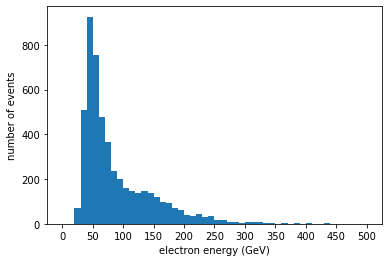

Figure 3: Distribution of electron energy.


In [8]:
plt.hist(data[' ele_E'], range=(0,500), bins=50)
plt.xlabel('electron energy (GeV)')
plt.ylabel('number of events')
plt.xticks(np.arange(0, 550, 50))
plt.show()
print(f'Figure {fig_num}: Distribution of electron energy.')
fig_num += 1

Figure 3 shows the distribution of electron energy for the 5000 $pp$ collisions. The results show a peak around $50~\text{GeV}$ and a rapidly decreasing number of events with energy greater than approximately $70~\text{GeV}$.

If $A$ were at rest,

\begin{equation*}
E_A^2 = m_{A}^2 + P_A^2 \rightarrow m_A^2.
\label{eq:6}
\tag{6}
\end{equation*}

Using  

\begin{equation}
\vec{P}_A =  \vec{P}_{e^-} + \vec{P}_{e^+} = 0
\tag{7}
\end{equation}

and that $e^{+/-}$ have the same mass, it would be expected that

\begin{equation}
E_{e^{+/-}} = \frac{m_A}{2} \approx 45~ \text{GeV}.
\tag{8}
\end{equation}

It is thought that the distrubtion in figure 3 is different for two reasons. Firstly, the mother particle does not always decay at rest, as shown by the results in figure 2. Therefore, the simplification in Eq. $\eqref{eq:6}$ is not valid.

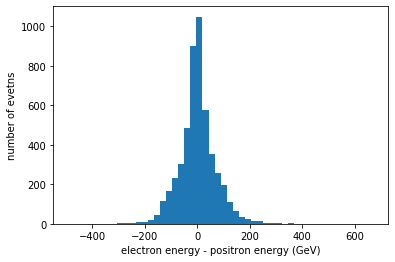

Figure 4: Electron positron energy difference for each event.


In [9]:
plt.hist(data[' ele_E']-data['  pos_E'], bins=50)
plt.xlabel('electron energy - positron energy (GeV)')
plt.ylabel('number of evetns')
plt.show()
print(f'Figure {fig_num}: Electron positron energy difference for each event.')
fig_num += 1

And secondly, the energy is not always split equally between the postitron and the electron, as shown by figure 4.

## Conclusion  

The results from 5000 $pp$ collisions have been analysed and it has been found that a $Z$ boson is produced, which subsequently decays into an $e^-e^+$ pair. The $Z$ boson does not always decay at rest and the total energy is not always split equally between the electron and the positron.